In [1]:
import pandas as pd
import seaborn as sns
import os


In [2]:
B = 'EPA1352-G06-A1/data/raw/Bridges.xlsx'
Bridge = pd.read_excel(B) 
Bridge.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,3976.0,8.976,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,305.0,12.660,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,333.0,12.688,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,1672.0,17.134,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,2260.0,17.222,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0


In [3]:
#add a column that converts the latitude degree/minutes/seconds to decimals
Bridge['LatitudeDecimal'] = Bridge['LatitudeDegree'] + (Bridge['LatitudeMinute']/60) + (Bridge['LatitudeSecond']/3600)

In [4]:
#add a column that converts the longitude degree/minutes/seconds to decimals
Bridge['LongitudeDecimal'] = Bridge['LongitudeDegree'] + (Bridge['LongitudeMinute']/60) + (Bridge['LongitudeSecond']/3600)
Bridge.head()


,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0,23.702083,90.515917
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0,23.691222,90.544889
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0,23.691111,90.544889
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0,23.659417,90.569694
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0,23.656056,90.574361


<AxesSubplot:xlabel='TotalWidth', ylabel='Count'>

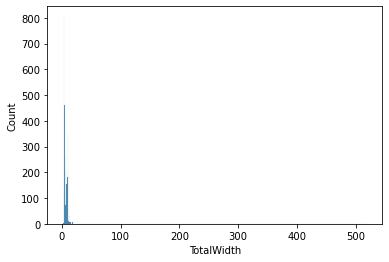

In [5]:
# plot a histogram of the total widths of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalWidth")

In [6]:
# check which bridges are wider than 30 meter
Bridge_width = Bridge.loc[Bridge["TotalWidth"]>30]
Bridge_width

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
56,57.0,Shikalbaha Bridge,PC Girder Bridge,A,31.2,17.30,2010.0,1.0,Chittagong,Chittagong,...,22.0,18.0,55.2,91.0,51.0,19.1,NaN,0.0,22.315333,91.855306
1309,1310.0,Bolloppur Bridge,RCC Girder Bridge,C,428.0,10.25,1997.0,1.0,Comilla,Comilla,...,23.0,34.0,17.2,90.0,56.0,56.3,NaN,31.0,23.571444,90.948972
2655,2656.0,NaN,RCC Girder Bridge,B,519.0,38.96,1998.0,3.0,Khulna,Khulna,...,22.0,58.0,5.0,89.0,45.0,19.0,NaN,30.0,22.968056,89.755278


After checking on google these bridges, only Shikalbaha Bridge is correct, the other two are too large namely, 428 and 519 meters


<AxesSubplot:xlabel='TotalLength', ylabel='Count'>

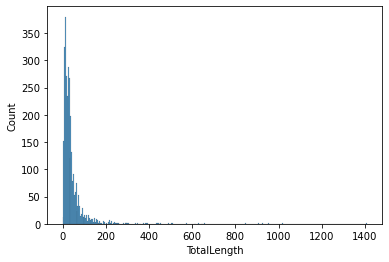

In [7]:
# plot a histogram of the total length of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalLength")

In [8]:
Bridge_lenth = Bridge.loc[Bridge["TotalLength"]>500]
Bridge_lenth.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
16,17.0,Meghna Bridge,PC Girder Bridge,A,9.14,924.85,1989.0,13.0,Dhaka,Dhaka,...,23.0,36.0,34.30,90.0,36.0,43.80,NaN,0.0,23.609528,90.612167
31,32.0,Daudkandi Bridge.,PC Box,A,9.13,1408.80,1995.0,17.0,Dhaka,Dhaka,...,23.0,31.0,47.50,90.0,41.0,42.50,NaN,0.0,23.529861,90.695139
55,56.0,Sha Amanot Bridge,PC Box,A,24.28,954.50,2009.0,11.0,Chittagong,Chittagong,...,22.0,19.0,44.90,91.0,51.0,6.00,NaN,0.0,22.329139,91.851667
227,228.0,Bhairab Bridge,PC Box,A,19.75,924.00,2002.0,9.0,Mymensingh,Mymensingh,...,24.0,2.0,55.84,90.0,59.0,30.15,NaN,0.0,24.048844,90.991708
439,440.0,Dhaleshwari Bridge,RCC Girder Bridge,A,7.90,506.59,1964.0,11.0,Dhaka,Dhaka,...,23.0,52.0,51.60,90.0,1.0,42.90,NaN,0.0,23.881000,90.028583


There is no strange outliers identiefied for the length of the bridges.

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
942,943.0,Saforpur Bridge,RCC Girder Bridge,B,4.0,24.3,2080.0,3.0,Sylhet,Moulavi Bazar,...,24.0,37.0,31.0,92.0,8.0,59.0,NaN,30.0,24.625278,92.149722


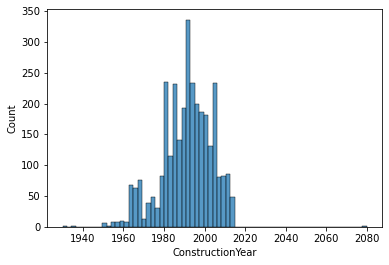

In [9]:
# plot a histogram of the construction year of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x = 'ConstructionYear')
ConstructionYear = Bridge.loc[Bridge["ConstructionYear"]>2021]
ConstructionYear

This bridge is from 2080, need to be recoded to 1980 or deleted. 

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
346,347.0,Keen Bridge,Steel Beam & RCC Slab,C,5.80,358.00,1936.0,22.0,Sylhet,Sylhet,...,24.0,53.0,10.3,91.0,52.0,5.2,NaN,560.0,24.886194,91.868111
609,610.0,Postagola Bridge,PC Girder Bridge,A,17.60,847.90,1989.0,21.0,Dhaka,Dhaka,...,23.0,41.0,21.7,90.0,25.0,45.9,NaN,0.0,23.689361,90.429417
1188,1189.0,Babu Bazar Bridge,PC Girder Bridge,A,17.60,1018.00,2000.0,31.0,Dhaka,Dhaka,...,23.0,42.0,17.6,90.0,23.0,56.7,NaN,0.0,23.704889,90.399083
1242,1243.0,Gabkhan Bridge,PC Girder Bridge,B,9.75,910.60,2001.0,25.0,Barisal,Barisal,...,22.0,38.0,34.0,90.0,10.0,58.0,NaN,1.0,22.642778,90.182778
2208,2209.0,Atrai Bridge.,RCC Girder Bridge,A,7.87,492.58,2006.0,24.0,Rangpur,Dinajpur,...,25.0,55.0,50.4,88.0,43.0,14.7,NaN,0.0,25.930667,88.720750


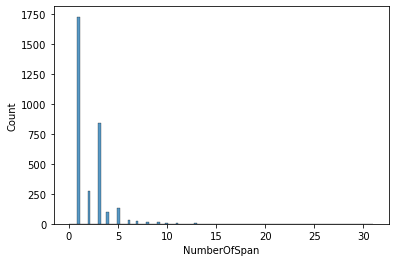

In [10]:
sns.histplot(data = Bridge, x = 'NumberOfSpan')
NumberOfSpan = Bridge.loc[Bridge["NumberOfSpan"]>20]
NumberOfSpan

All these bridges were checked with google and are correct. 

All bridges with a length superior to 500m are actualy existing and that large. 

In [11]:
import geopandas as gpd

In [ ]:
land = gpd.read_file("EPA1352-G06-A1/data/raw/BGD_adm0.shp")
land["geometry"] = land.buffer(500)
land.plot()

In [ ]:
bridge_geo = gpd.GeoDataFrame(Bridge, geometry=gpd.points_from_xy(Bridge["LongitudeDecimal"], Bridge["LatitudeDecimal"]))
bridge_geo.plot()

In [25]:
sea_bridge = Bridge.loc[Bridge["LatitudeDecimal"] < 21.834]
sea_bridge1 = sea_bridge.loc[sea_bridge["LongitudeDecimal"] > 90.121]
sea_bridge2 = sea_bridge1.loc[sea_bridge1["LongitudeDecimal"] < 91.85]
sea_bridge2.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal,geometry
1501,1502.0,Khursukul Bridge,Baily with Steel Deck,C,5.4,247.4,2003.0,5.0,Chittagong,Chittagong,...,26.0,43.6,91.0,39.0,21.7,NaN,30.0,21.445444,91.656028,POINT (91.656 91.656)


In [26]:
sea_bridge3 = Bridge.loc[Bridge["LatitudeDegree"] < 20.794]
sea_bridge3.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal,geometry
113,114.0,Chowdhory Para Bridge,RCC Girder Bridge,C,7.40,45.6,1978.0,3.0,Chittagong,Chittagong,...,59.0,56.7,92.0,15.0,14.0,NaN,32.0,20.999083,92.253889,POINT (92.254 92.254)
114,115.0,Rongi-Khali Bridge,RCC Girder Bridge,C,7.30,12.5,1996.0,1.0,Chittagong,Chittagong,...,59.0,15.4,92.0,15.0,16.5,NaN,60.0,20.987611,92.254583,POINT (92.255 92.255)
115,116.0,Ala Khali Kuna Para Bridge,RCC Girder Bridge,C,7.30,29.9,1985.0,3.0,Chittagong,Chittagong,...,58.0,39.1,92.0,15.0,2.4,NaN,60.0,20.977528,92.250667,POINT (92.251 92.251)
116,117.0,Ladapara Bridge,RCC Girder Bridge,A,7.25,36.6,1996.0,3.0,Chittagong,Chittagong,...,58.0,5.5,92.0,14.0,55.8,NaN,0.0,20.968194,92.248833,POINT (92.249 92.249)
117,118.0,Noya Para Bridge,RCC Girder Bridge,C,7.30,30.4,1976.0,3.0,Chittagong,Chittagong,...,57.0,44.6,92.0,15.0,10.5,NaN,60.0,20.962389,92.252917,POINT (92.253 92.253)


In [27]:
sea_bridge4 = Bridge.loc[Bridge["LatitudeDegree"] < 21.45]
sea_bridge5 = sea_bridge4.loc[sea_bridge4["LongitudeDegree"] < 91.89]
sea_bridge5.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal,geometry
835,836.0,Shilkop Bridge,Truss with Steel Deck,C,5.00,34.0,1968.0,1.0,Chittagong,Chittagong,...,58.0,43.6,91.0,57.0,15.2,NaN,31.0,21.978778,91.954222,POINT (91.954 91.954)
836,837.0,Chambol Bridge,Truss with Steel Deck,B,3.75,15.2,2002.0,1.0,Chittagong,Chittagong,...,57.0,50.3,91.0,57.0,22.0,NaN,3.0,21.963972,91.956111,POINT (91.956 91.956)
837,838.0,Bohadder Bridge,RCC Girder Bridge,C,6.60,9.9,1989.0,1.0,Chittagong,Chittagong,...,55.0,14.3,91.0,57.0,41.2,NaN,562.0,21.920639,91.961444,POINT (91.961 91.961)
838,839.0,Pushuri Prem Bridge,Truss with Steel Deck,A,4.25,43.3,2002.0,1.0,Chittagong,Chittagong,...,53.0,53.6,91.0,57.0,51.3,NaN,0.0,21.898222,91.964250,POINT (91.964 91.964)
839,840.0,Hashiyar Para Bridge,RCC Girder Bridge,B,9.95,15.8,2011.0,1.0,Chittagong,Chittagong,...,53.0,25.8,91.0,57.0,54.7,NaN,2.0,21.890500,91.965194,POINT (91.965 91.965)


In [28]:
sea_bridge6 = Bridge.loc[Bridge["LatitudeDegree"] < 22.05]
sea_bridge7 = sea_bridge6.loc[sea_bridge6["LongitudeDegree"] > 90]
sea_bridge8 = sea_bridge7.loc[sea_bridge7["LongitudeDegree"] < 91.64]
sea_bridge8.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal,geometry
43,44.0,Rampur Bridge(L),RCC Girder Bridge,B,12.50,22.86,1986.0,3.0,Comilla,Noakhali,...,59.0,46.0,91.0,24.0,2.0,NaN,1.0,22.996111,91.400556,POINT (91.401 91.401)
44,45.0,Rampur Bridge(R),PC Girder Bridge,A,10.86,22.15,2013.0,1.0,Comilla,Noakhali,...,59.0,46.0,91.0,24.0,2.0,NaN,0.0,22.996111,91.400556,POINT (91.401 91.401)
45,46.0,Lemua Bridge(L),PC Girder Bridge,C,10.95,98.87,1982.0,3.0,Comilla,Noakhali,...,57.0,45.0,91.0,26.0,30.0,NaN,60.0,22.962500,91.441667,POINT (91.442 91.442)
46,47.0,Muhuri Bridge(L),PC Girder Bridge,B,11.20,193.22,1972.0,6.0,Comilla,Noakhali,...,56.0,59.0,91.0,30.0,3.0,NaN,1.0,22.949722,91.500833,POINT (91.501 91.501)
47,48.0,DumGhat Bridge(L),PC Girder Bridge,A,11.12,222.43,1974.0,7.0,Comilla,Noakhali,...,54.0,56.0,91.0,31.0,31.0,NaN,0.0,22.915556,91.525278,POINT (91.525 91.525)


In [29]:
sea_bridges_final = Bridge.subtract(sea_bridge2, axis= 0)
sea_bridges_final

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
new = df1.merge(df2,on=['Team','Year'],how='left')
sea_bridge5.rows - sea_bridge3.rows - sea_bridge2.rows
